In [3]:
import pandas as pd
import numpy
import os
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [2]:
datPath = os.getcwd() + '/Data/'


/Users/darrensunart/Projects/elearning-covid19/Data/


# Take a look at engagement data
### Engagement data
The engagement data are aggregated at school district level, and each file in the folder `engagement_data` represents data from one school district. The 4-digit file name represents `district_id` which can be used to link to district information in `district_info.csv`. The `lp_id` can be used to link to product information in `product_info.csv`.

| Name | Description |
| :--- | :----------- |
| time | date in "YYYY-MM-DD" |
| lp_id | The unique identifier of the product |
| pct_access | Percentage of students in the district have at least one page-load event of a given product and on a given day |
| engagement_index | Total page-load events per one thousand students of a given product and on a given day |


In [43]:
engagement_files = glob.glob(datPath + '/engagement_data/*.csv')

dfs = []

for file in engagement_files:
    
    df = pd.read_csv(file)
    district_id = file.split('/')[-1].split('.')[0]
    df['district_id'] = [district_id]*len(df)
    dfs.append(df)
engagement_df = pd.concat(dfs,axis=0).dropna()
engagement_df.lp_id = engagement_df.lp_id.astype(int)
engagement_df.district_id = engagement_df.district_id.astype(int)
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16945301 entries, 0 to 36572
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             int64  
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 775.7+ MB


In [44]:
product_info = pd.read_csv(datPath + '/products_info.csv')
product_info = product_info.rename(columns={'LP ID':'lp_id'})
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   lp_id                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [85]:
engagement_product = engagement_df.merge(product_info, on='lp_id', how='inner')
engagement_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9414268 entries, 0 to 9414267
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   time                        object 
 1   lp_id                       int64  
 2   pct_access                  float64
 3   engagement_index            float64
 4   district_id                 int64  
 5   URL                         object 
 6   Product Name                object 
 7   Provider/Company Name       object 
 8   Sector(s)                   object 
 9   Primary Essential Function  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 790.1+ MB


In [81]:
district_info = pd.read_csv(datPath + '/districts_info.csv')
district_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [82]:
from ast import literal_eval
def clean_numerical_data(t):
    t = literal_eval(t[:-1]+']')
    
    return t
 
cols = ['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']

for col in cols:
    mask = district_info[col].isnull() == False
    district_info.loc[mask,col] = district_info.loc[mask,col].apply(clean_numerical_data)

district_info.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2]","[0, 0.2]","[0.18, 1]","[14000, 16000]"
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2]","[0.2, 0.4]","[0.18, 1]","[6000, 8000]"
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
engagement_product_district_df = engagement_product.merge(district_info, on = 'district_id', how = 'inner')
engagement_product_district_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9414268 entries, 0 to 9414267
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   time                        object 
 1   lp_id                       int64  
 2   pct_access                  float64
 3   engagement_index            float64
 4   district_id                 int64  
 5   URL                         object 
 6   Product Name                object 
 7   Provider/Company Name       object 
 8   Sector(s)                   object 
 9   Primary Essential Function  object 
 10  state                       object 
 11  locale                      object 
 12  pct_black/hispanic          object 
 13  pct_free/reduced            object 
 14  county_connections_ratio    object 
 15  pp_total_raw                object 
dtypes: float64(2), int64(2), object(12)
memory usage: 1.2+ GB


In [86]:
engagement_product_district_df.head(5)

,time,lp_id,pct_access,engagement_index,district_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-01,29322,0.04,1.30,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,29322,0.26,17.78,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,29322,0.82,121.42,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,29322,2.86,451.43,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,29322,2.64,269.50,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN


# Let's plot some of the engagement data
## What're the engagement distributions like?


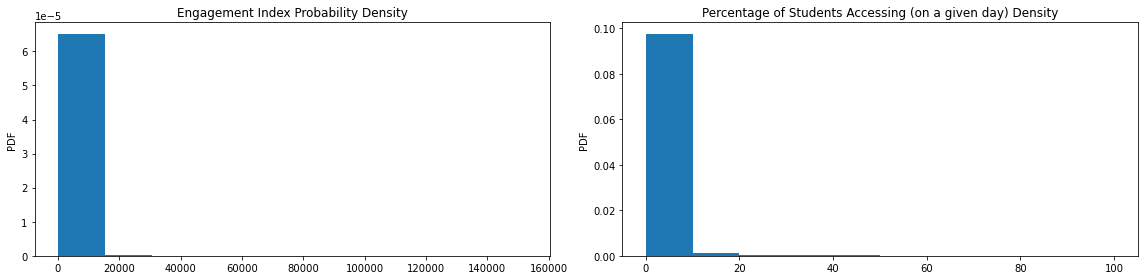

In [149]:
figure = plt.figure(figsize = (16,4))

ax1 = figure.add_subplot(121)
engagement_product_district_df.engagement_index.plot.hist(density = True, ax = ax1)
ax1.set_title('Engagement Index Probability Density')
ax1.set_ylabel('PDF')

ax2 = figure.add_subplot(122)
engagement_product_district_df.pct_access.plot.hist(density = True, ax=ax2)
ax2.set_title('Percentage of Students Accessing (on a given day) Density')
ax2.set_ylabel('PDF')

plt.tight_layout()

## How does engagement vary by product?

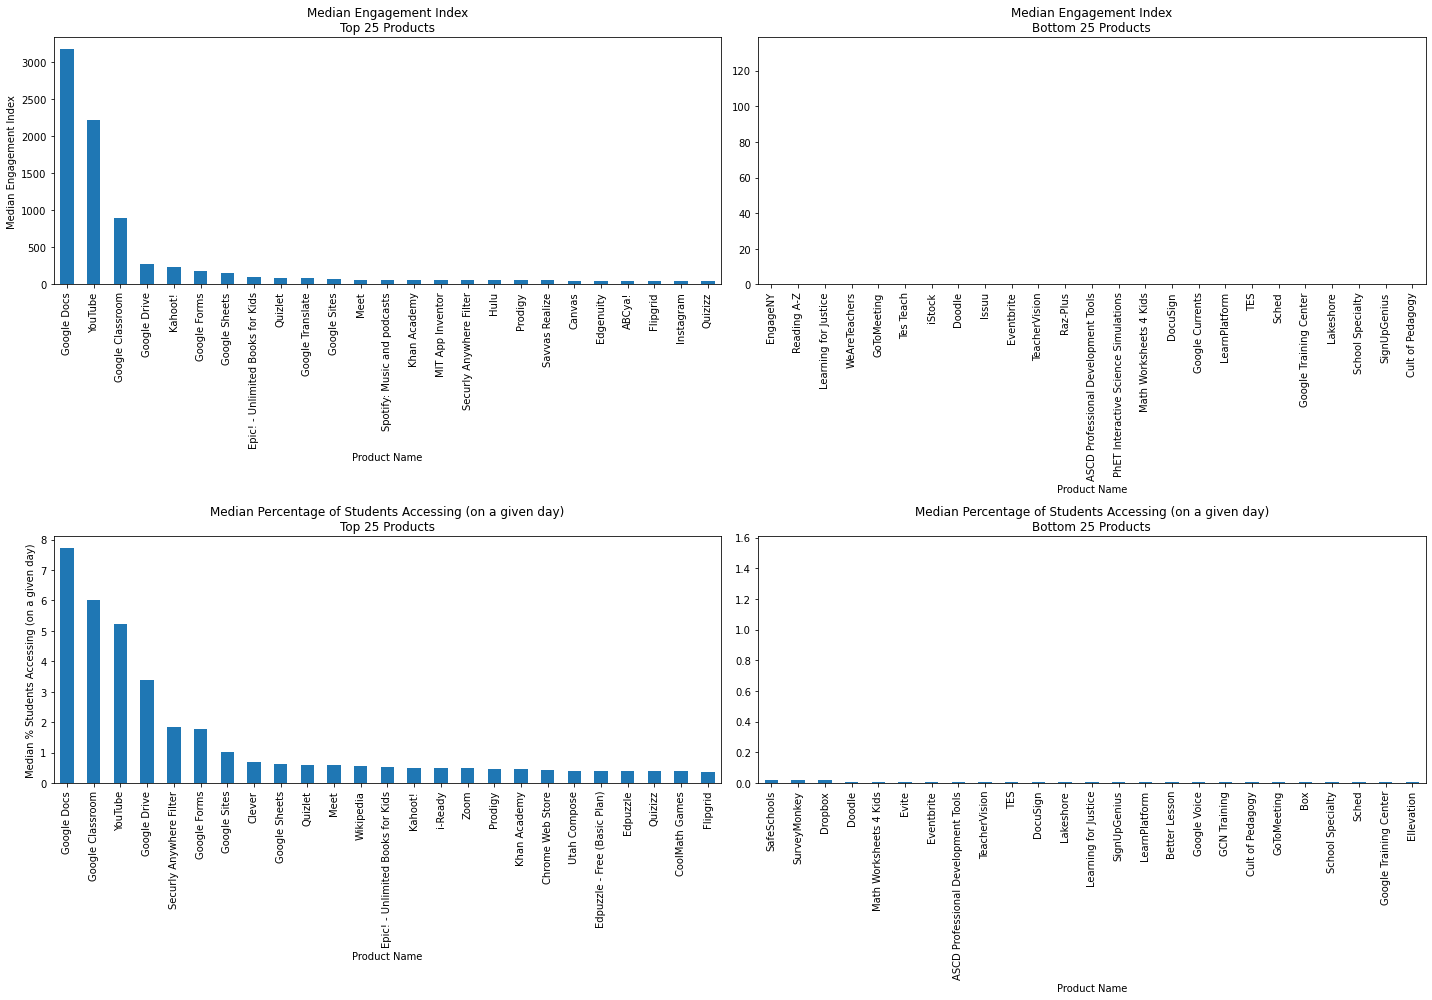

In [126]:
figure = plt.figure(figsize = (20,14))
ax1 = figure.add_subplot(221)
pt1 = (engagement_product_district_df.groupby('Product Name').median()['engagement_index']
 .sort_values(ascending = False).iloc[:25].plot(kind = 'bar', ax = ax1))
ax1.set_title('Median Engagement Index\nTop 25 Products')
ax1.set_ylabel('Median Engagement Index')

ax2 = figure.add_subplot(222)
pt2 = (engagement_product_district_df.groupby('Product Name').median()['engagement_index']
 .sort_values(ascending = False).iloc[-25:].plot(kind = 'bar', ax = ax2))
ax2.set_title('Median Engagement Index\nBottom 25 Products')
ax2.set_ylim(ymax=engagement_product_district_df.groupby('district_id').median()['engagement_index'].max())
# ax2.set_ylabel('Mean Engagement Index')

ax3 = figure.add_subplot(223)
pt3 = (engagement_product_district_df.groupby('Product Name').median()['pct_access']
 .sort_values(ascending = False).iloc[:25].plot(kind = 'bar', ax = ax3))
ax3.set_title('Median Percentage of Students Accessing (on a given day)\nTop 25 Products')
ax3.set_ylabel('Median % Students Accessing (on a given day)') 

ax4 = figure.add_subplot(224)
pt4 = (engagement_product_district_df.groupby('Product Name').median()['pct_access']
 .sort_values(ascending = False).iloc[-25:].plot(kind = 'bar', ax = ax4))
ax4.set_title('Median Percentage of Students Accessing (on a given day)\nBottom 25 Products')
ax4.set_ylim(ymax=engagement_product_district_df.groupby('district_id').median()['pct_access'].max())
# ax4.set_ylabel('Mean % Students Accessing (on a given day)')

plt.tight_layout()

## ... and by district

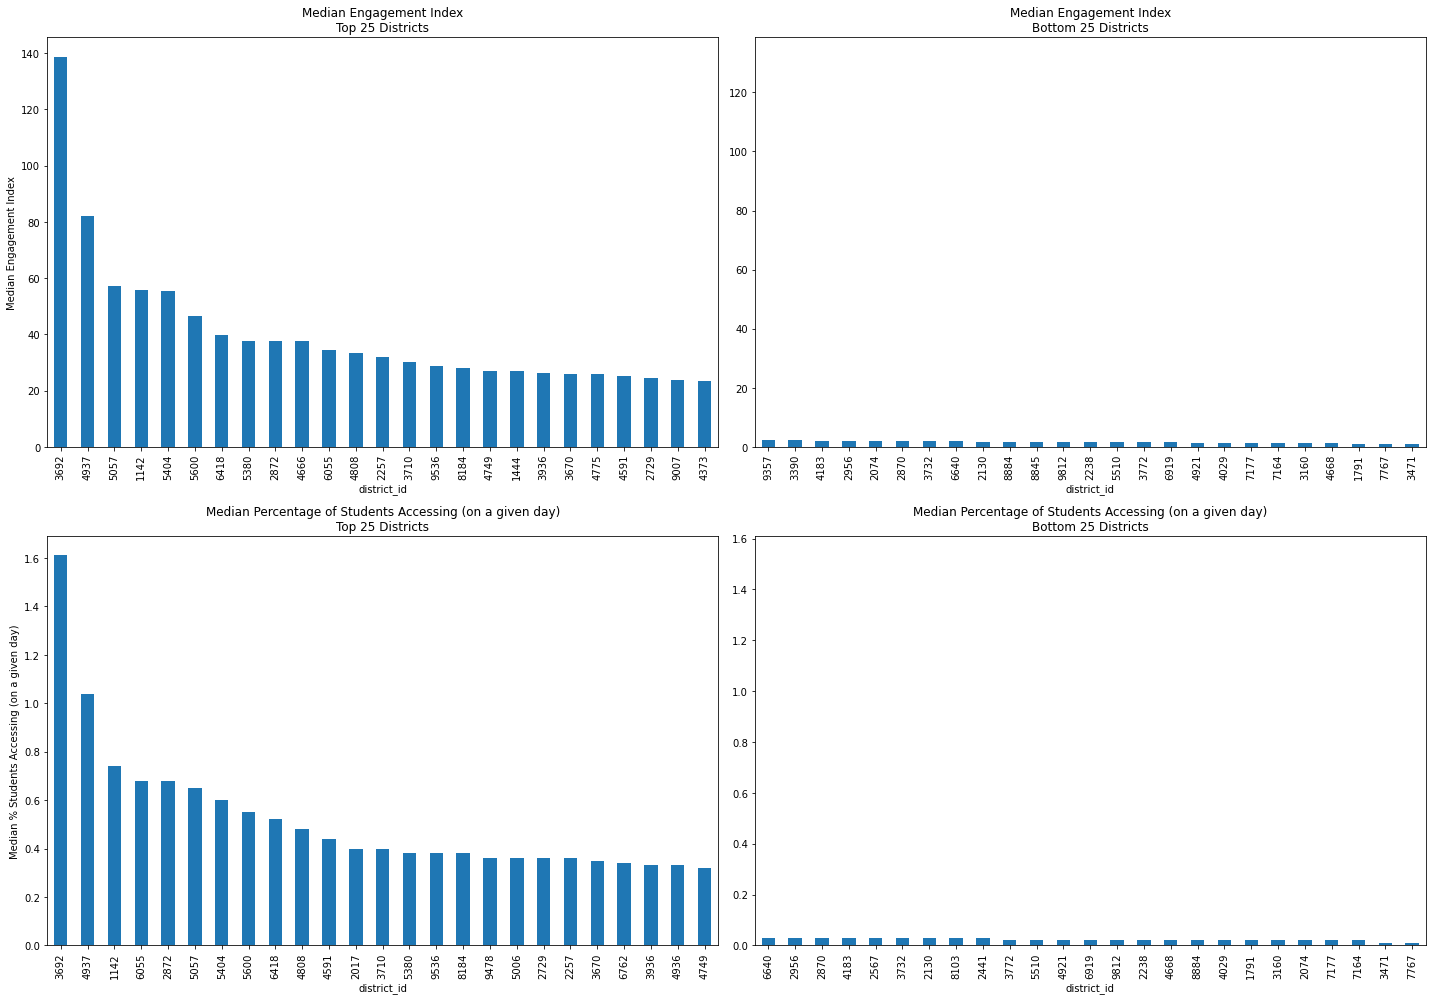

In [125]:
figure = plt.figure(figsize = (20,14))
ax1 = figure.add_subplot(221)
pt1 = (engagement_product_district_df.groupby('district_id').median()['engagement_index']
 .sort_values(ascending = False).iloc[:25].plot(kind = 'bar', ax = ax1))
ax1.set_title('Median Engagement Index\nTop 25 Districts')
ax1.set_ylabel('Median Engagement Index')

ax2 = figure.add_subplot(222)
pt2 = (engagement_product_district_df.groupby('district_id').median()['engagement_index']
 .sort_values(ascending = False).iloc[-25:].plot(kind = 'bar', ax = ax2))
ax2.set_title('Median Engagement Index\nBottom 25 Districts')
ax2.set_ylim(ymax=engagement_product_district_df.groupby('district_id').median()['engagement_index'].max())
# ax2.set_ylabel('Mean Engagement Index')

ax3 = figure.add_subplot(223)
pt3 = (engagement_product_district_df.groupby('district_id').median()['pct_access']
 .sort_values(ascending = False).iloc[:25].plot(kind = 'bar', ax = ax3))
ax3.set_title('Median Percentage of Students Accessing (on a given day)\nTop 25 Districts')
ax3.set_ylabel('Median % Students Accessing (on a given day)') 

ax4 = figure.add_subplot(224)
pt4 = (engagement_product_district_df.groupby('district_id').median()['pct_access']
 .sort_values(ascending = False).iloc[-25:].plot(kind = 'bar', ax = ax4))
ax4.set_title('Median Percentage of Students Accessing (on a given day)\nBottom 25 Districts')
ax4.set_ylim(ymax=engagement_product_district_df.groupby('district_id').median()['pct_access'].max())
# ax4.set_ylabel('Mean % Students Accessing (on a given day)')

plt.tight_layout()

## How about across time?

In [133]:
engagement_product_district_df['time'] = pd.to_datetime(engagement_product_district_df['time'], format = '%Y-%m-%d')
engagement_product_district_df.head()

,time,lp_id,pct_access,engagement_index,district_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-01,29322,0.04,1.30,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,29322,0.26,17.78,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,29322,0.82,121.42,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-06,29322,2.86,451.43,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-07,29322,2.64,269.50,3188,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,LC - Digital Learning Platforms,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time'>

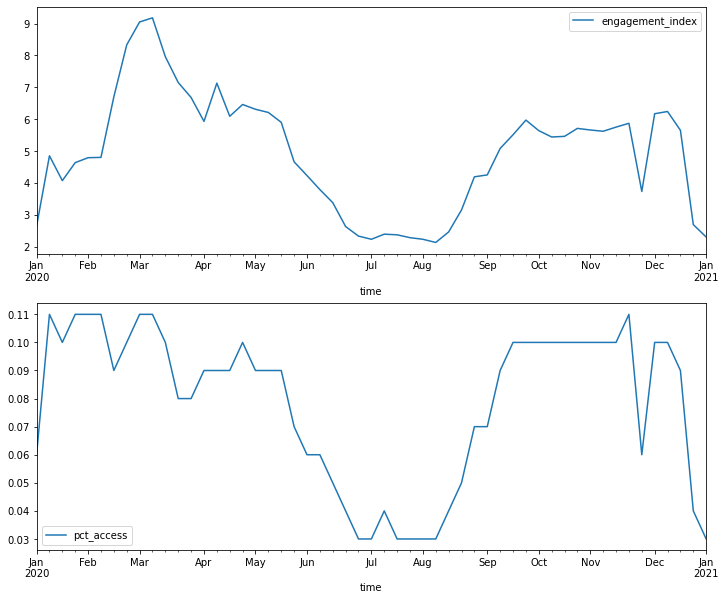

In [144]:
figure = plt.figure(figsize=(12,10))
ax1 = figure.add_subplot(211)
(engagement_product_district_df.groupby(pd.Grouper(key='time', freq='W-MON'))['engagement_index']
       .median()
       .reset_index()
       .sort_values('time')).plot(x='time',y='engagement_index', ax=ax1)

ax2 = figure.add_subplot(212)
(engagement_product_district_df.groupby(pd.Grouper(key='time', freq='W-MON'))['pct_access']
       .median()
       .reset_index()
       .sort_values('time')).plot(x='time',y='pct_access', ax=ax2)